# Imbalanced Classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('./data/train/train.csv')

In [15]:
df.describe()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672,0.062058
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001,0.241261
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000,0.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000,0.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000


In [4]:
df.head()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [41]:
len(df.columns.values)

41

In [5]:
df.groupby('income_level').last()

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,family_members_under_18,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year
income_level,,,,,,,,,,,,,,,,,,,,,
-50000,32,Private,42,30,High school graduate,0,Not in universe,Never married,Medical except hospital,Other service,...,Not in universe,United-States,United-States,United-States,Foreign born- Not a citizen of U S,0,Not in universe,2,52,94
50000,47,Local government,43,12,Doctorate degree(PhD EdD),0,Not in universe,Married-civilian spouse present,Education,Professional specialty,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94


In [6]:
print(df.dtypes)
df['income_level'] = np.where(df['income_level'] == -50000,0,1)
#df['income_level'] = df['income_level'].astype(str)

age                                  int64
class_of_worker                     object
industry_code                        int64
occupation_code                      int64
education                           object
wage_per_hour                        int64
enrolled_in_edu_inst_lastwk         object
marital_status                      object
major_industry_code                 object
major_occupation_code               object
race                                object
hispanic_origin                     object
sex                                 object
member_of_labor_union               object
reason_for_unemployment             object
full_parttime_employment_stat       object
capital_gains                        int64
capital_losses                       int64
dividend_from_Stocks                 int64
tax_filer_status                    object
region_of_previous_residence        object
state_of_previous_residence         object
d_household_family_stat             object
d_household

In [7]:
df.groupby(['income_level']).count().apply(lambda x : round(x/len(df),2),axis=1)

,age,class_of_worker,industry_code,occupation_code,education,wage_per_hour,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,...,family_members_under_18,country_father,country_mother,country_self,citizenship,business_or_self_employed,fill_questionnaire_veteran_admin,veterans_benefits,weeks_worked_in_year,year
income_level,,,,,,,,,,,,,,,,,,,,,
0,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.94,...,0.94,0.91,0.91,0.92,0.94,0.94,0.94,0.94,0.94,0.94
1,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06


In [8]:
df.industry_code.unique()

array([ 0,  4, 40, 34, 43, 37, 24, 39, 12, 35, 45,  3, 19, 29, 32, 48, 33,
       23, 44, 36, 31, 30, 41,  5, 11,  9, 42,  6, 18, 50,  2,  1, 26, 47,
       16, 14, 22, 17,  7,  8, 25, 46, 27, 15, 13, 49, 38, 21, 28, 20, 51,
       10], dtype=int64)

In [9]:
#return all numeric columns 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric = df.select_dtypes(include=numerics)
numeric.head()

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
0,73,0,0,0,0,0,0,0,0,2,0,95,0
1,58,4,34,0,0,0,0,1,0,2,52,94,0
2,18,0,0,0,0,0,0,0,0,2,0,95,0
3,9,0,0,0,0,0,0,0,0,0,0,94,0
4,10,0,0,0,0,0,0,0,0,0,0,94,0


In [10]:
#Return all categories

categories = df.select_dtypes(exclude=numerics)
categories.head()

,class_of_worker,education,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,...,migration_reg,migration_within_reg,live_1_year_ago,migration_sunbelt,family_members_under_18,country_father,country_mother,country_self,citizenship,fill_questionnaire_veteran_admin
0,Not in universe,High school graduate,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,NaN,NaN,Not in universe under 1 year old,NaN,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
1,Self-employed-not incorporated,Some college but no degree,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,...,Same county,Same county,No,Yes,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
2,Not in universe,10th grade,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,...,NaN,NaN,Not in universe under 1 year old,NaN,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,Not in universe
3,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Nonmover,Nonmover,Yes,Not in universe,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Nonmover,Nonmover,Yes,Not in universe,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe


In [11]:
##frequencies/dealing with those with less than 5%
categories.groupby('class_of_worker').count().apply(lambda x : round(x/len(df),2),axis=1).reset_index()

,class_of_worker,education,enrolled_in_edu_inst_lastwk,marital_status,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_labor_union,...,migration_reg,migration_within_reg,live_1_year_ago,migration_sunbelt,family_members_under_18,country_father,country_mother,country_self,citizenship,fill_questionnaire_veteran_admin
0,Federal government,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
1,Local government,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,...,0.02,0.02,0.04,0.02,0.04,0.04,0.04,0.04,0.04,0.04
2,Never worked,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,Not in universe,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,...,0.25,0.25,0.50,0.25,0.50,0.48,0.48,0.49,0.50,0.50
4,Private,0.36,0.36,0.36,0.36,0.36,0.36,0.36,0.36,0.36,...,0.18,0.18,0.36,0.18,0.36,0.35,0.35,0.35,0.36,0.36
5,Self-employed-incorporated,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.01,0.01,0.02,0.01,0.02,0.02,0.02,0.02,0.02,0.02
6,Self-employed-not incorporated,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,...,0.02,0.02,0.04,0.02,0.04,0.04,0.04,0.04,0.04,0.04
7,State government,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.01,0.01,0.02,0.01,0.02,0.02,0.02,0.02,0.02,0.02
8,Without pay,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


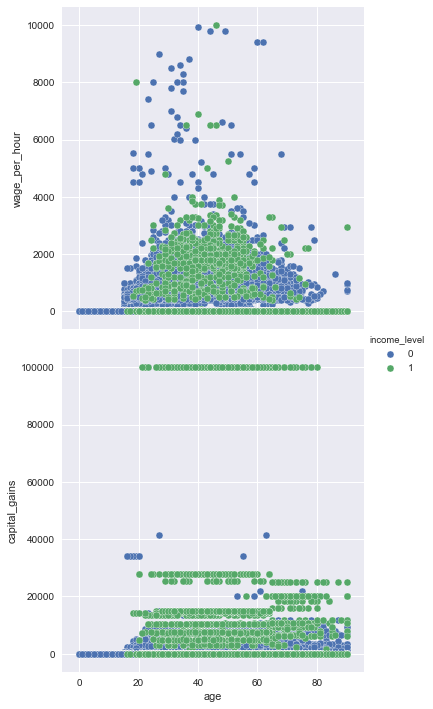

In [12]:
#plot all numeric columns against income_level
pp = sns.pairplot(data=numeric,
                  x_vars = ['age'],
                  y_vars = ['wage_per_hour','capital_gains'],
                  hue='income_level',
                  size=5,
                  aspect=1
                 )

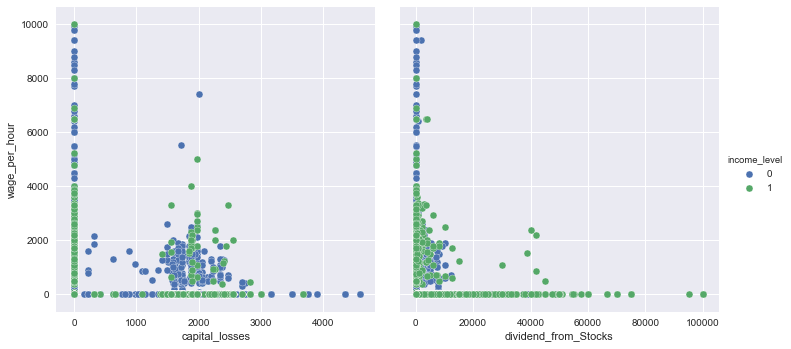

In [13]:
#plot all numeric columns against income_level
pp = sns.pairplot(data=numeric,
                  x_vars = ['capital_losses','dividend_from_Stocks'],
                  y_vars = ['wage_per_hour'],
                  hue='income_level',
                  size=5,
                  aspect=1
                 )

In [14]:
# #Bin numeric columns
# bins = [0,20,30,40,50,60,70,80,90,100]
# bin_names = ['0-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
# numeric['age'] = pd.cut(numeric['age'],bins,labels=bin_names)
# numeric.head()

C:\Users\jcarp\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
0,70-80,0,0,0,0,0,0,0,0,2,0,95,0
1,50-60,4,34,0,0,0,0,1,0,2,52,94,0
2,0-20,0,0,0,0,0,0,0,0,2,0,95,0
3,0-20,0,0,0,0,0,0,0,0,0,0,94,0
4,0-20,0,0,0,0,0,0,0,0,0,0,94,0


C:\Users\jcarp\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


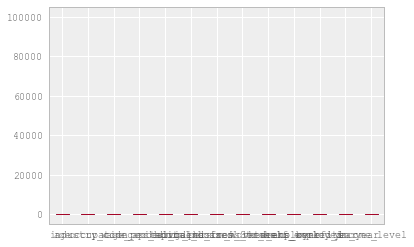

In [17]:
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BBB2F23F60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BBB35DA710>]], dtype=object)

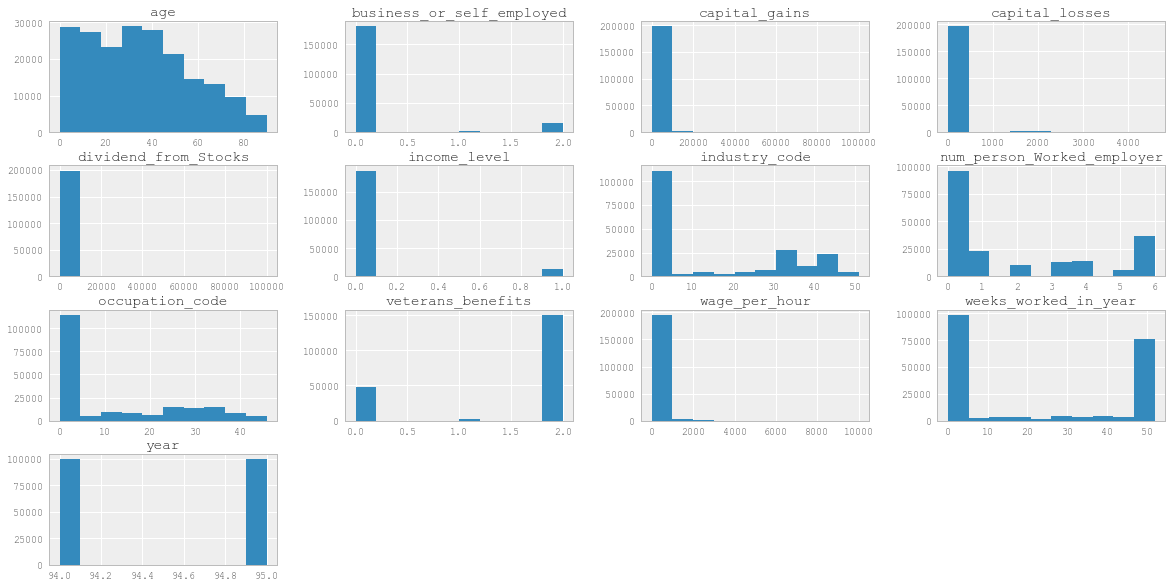

In [19]:
df.hist(figsize=(20,10))

income_level
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: age, dtype: object

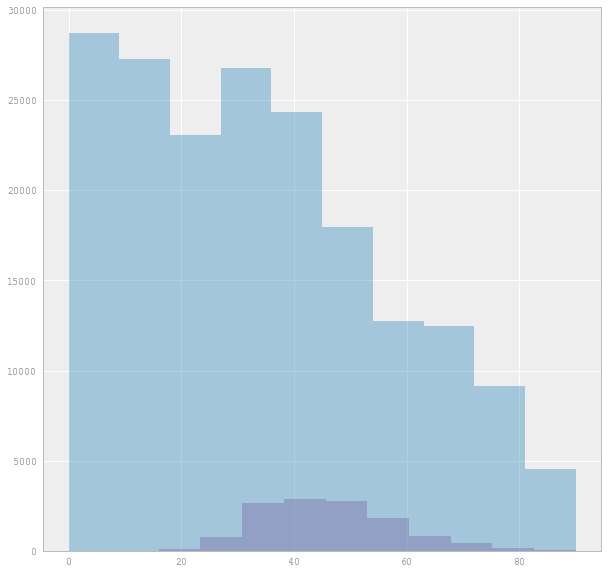

In [33]:
df.groupby('income_level').age.hist(figsize=(10,10),alpha=0.4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BBBAA56D68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001BBBFBB4518>]], dtype=object)

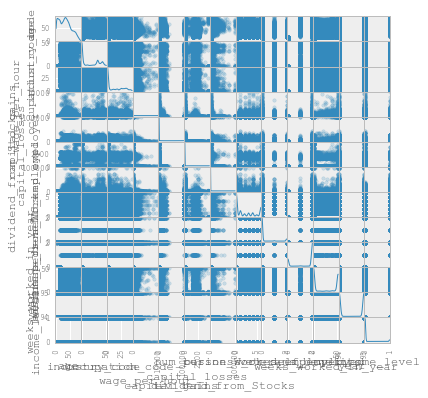

In [34]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

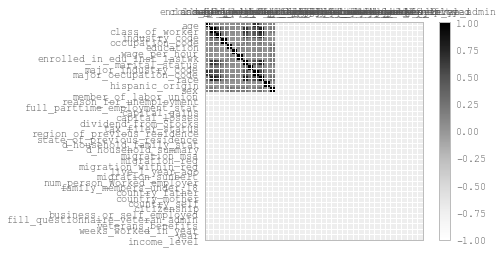

In [45]:
correlations = df.corr()
names=df.columns.values
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,41,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [43]:
correlations

,age,industry_code,occupation_code,wage_per_hour,capital_gains,capital_losses,dividend_from_Stocks,num_person_Worked_employer,business_or_self_employed,veterans_benefits,weeks_worked_in_year,year,income_level
age,1.000000,0.157822,0.117414,0.036938,0.053590,0.063351,0.104976,0.140887,-0.002265,0.674844,0.206181,0.004413,0.135720
industry_code,0.157822,1.000000,0.563493,0.165980,0.066017,0.072586,0.012774,0.642096,0.252694,0.476475,0.754472,0.003430,0.196190
occupation_code,0.117414,0.563493,1.000000,0.194498,0.002534,0.043680,-0.026726,0.515554,0.228952,0.438680,0.655613,-0.003140,0.013414
wage_per_hour,0.036938,0.165980,0.194498,1.000000,-0.001082,0.010993,-0.005731,0.191543,0.054051,0.113094,0.195687,0.002283,0.024528
capital_gains,0.053590,0.066017,0.002534,-0.001082,1.000000,-0.012700,0.131476,0.058015,0.015048,0.051530,0.083549,0.005243,0.240725
capital_losses,0.063351,0.072586,0.043680,0.010993,-0.012700,1.000000,0.042427,0.084255,0.024116,0.075391,0.100762,0.000096,0.147417
dividend_from_Stocks,0.104976,0.012774,-0.026726,-0.005731,0.131476,0.042427,1.000000,0.007206,-0.004885,0.054585,0.013823,0.001913,0.175779
num_person_Worked_employer,0.140887,0.642096,0.515554,0.191543,0.058015,0.084255,0.007206,1.000000,0.240553,0.463334,0.747302,0.018774,0.222684
business_or_self_employed,-0.002265,0.252694,0.228952,0.054051,0.015048,0.024116,-0.004885,0.240553,1.000000,0.177448,0.265872,0.007377,0.040473
veterans_benefits,0.674844,0.476475,0.438680,0.113094,0.051530,0.075391,0.054585,0.463334,0.177448,1.000000,0.532279,0.003122,0.140930


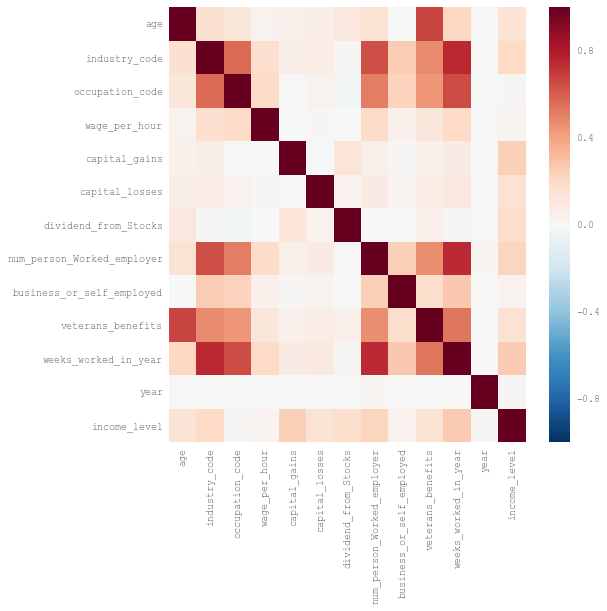

In [62]:
# plot the heatmap
plt.figure(figsize = (8,8))
sns.heatmap(correlations)

In [ ]:
sns.set(style="ticks")

sns.pairplot(df, hue="income_level")